In [1]:
import matplotlib.pyplot as plt
# from mpl_toolkits.axisartist.axislines import SubplotZero
# import matplotlib.patches as patches
import random
import math
import copy
import time
import sys

import numpy as np
# import tensorflow as tf

import os

np.random.seed(1)

plt.rc('font',family='Times New Roman',size=20)
# plt.rc('lines', linewidth=3)

folder="VLDB2024 (camera ready)"
random.seed(10)
bit_letters = ["A", "B", "C", "D", "E"]
factor_letters = ["a", "b", "c", "d", "e"]
logger_print = True
# value_letters = ["x", "y", "z"]
from time import perf_counter
plt.rcParams['hatch.linewidth'] = 2
# plt.rcParams['mathtext.default'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'


# Font sizes
title_fontsize = 28
label_fontsize = 28
tick_fontsize = 28
annotation_fontsize = 18
markersize=12
# colors = ['bisque', 'aquamarine', 'cornflowerblue']
colors = ['silver','red', 'cornflowerblue', 'orange','orchid','limegreen','brown']
patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O']
# markers=['o','^','s']
# colors = ['blue', 'green', 'red']
linewidth=4
plt.rcParams["figure.figsize"] = (6,2)

markers = [
    'o',  # circle marker
    '*',  # star marker
    's',  # square marker
    'v',  # triangle_down marker
    
    'D',  # hexagon2 marker
    'p',  # pentagon marker
    '>',  # triangle_right marker
    '1',  # tri_down marker
    'h',  # hexagon1 marker
'+',  # tri_right marker
    '+',  # plus marker
    'x',  # x marker
    'D',  # diamond marker
    'd',  # thin_diamond marker
    '|',  # vline marker
    '_'   # hline marker
]


###  Figure 1. Varying dataset cardinality. report learning cost

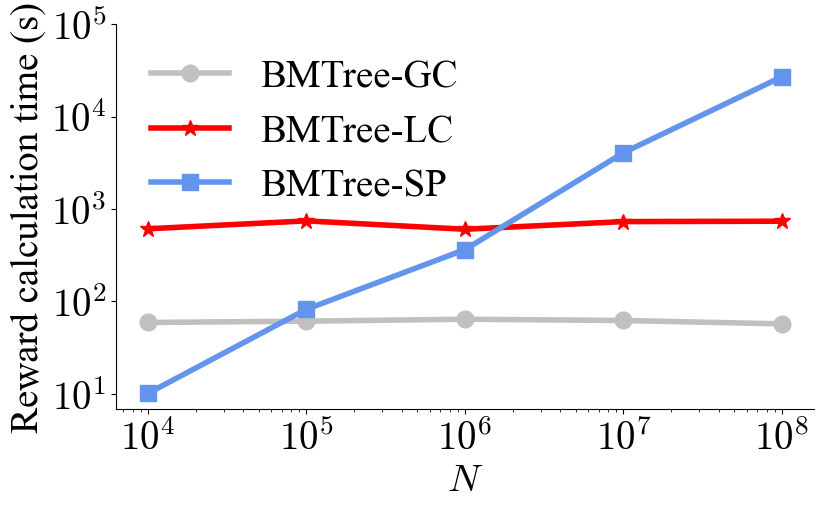

In [2]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# plt.style.use('seaborn')  # Use the 'seaborn' style


# Dataset sizes and time saved scores
dataset_sizes = [10000, 100000, 1000000, 10000000, 100000000]

BMTree_GC = [59, 61, 64, 62, 57] # Method B
BMTree_LC = [610, 743, 603, 730, 737] # Method B
BMTree_SP = [10.069, 82, 363, 4066, 27028] # Method A



all_methods = [
    BMTree_GC,
    BMTree_LC,
    BMTree_SP,
]



labels = ['BMTree-GC', 'BMTree-LC', 'BMTree-SP']

# Set up figure and axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    


for i in range(len(all_methods)):
#     line1, = ax.plot(dataset_sizes, all_methods[i], marker=markers[i], label=labels[i], color=colors[i],
#                     linewidth=linewidth, markersize=markersize)
    line1, = ax.plot(dataset_sizes, all_methods[i], linewidth=linewidth, markersize=markersize,
        color=colors[i], marker=markers[i], label=labels[i],markeredgewidth=1)

    # Annotate data points for Method A
#     for x, y in zip(dataset_sizes, all_methods[i]):
#         ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10,-15), ha='center', fontsize=annotation_fontsize, color=colors[i])

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$N$', fontsize=label_fontsize)
ax.set_ylabel('Reward calculation time (s)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=title_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)
ax.set_xticks(dataset_sizes)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)
ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)
ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)
ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0)

plt.savefig('../figs/exp2/vary_datasize_time.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


###  Figure 2. Varying dataset cardinality. report query time cost

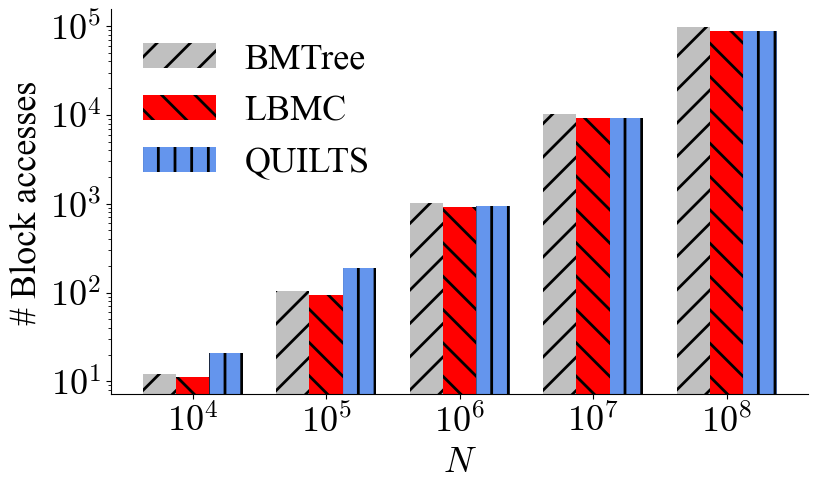

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]
dataset_sizes = [10000, 100000, 1000000, 10000000, 100000000]

BMTree_GC = [12.1225, 103.236, 1011.6425, 10111.84 , 97960.0035] # Global
BMTree_LC = [11.2095, 94.046, 922.3195 , 9200.0045, 89120.853] # Local
BMTree_SP = [20.661, 186.415, 948, 9226.007, 89189] # BMTree

all_methods = [
    BMTree_GC,
    BMTree_LC,
    BMTree_SP
]

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(9, 5))

# Width of the bars
width = 0.25
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(dataset_sizes))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

rs = [r1, r2, r3]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, label=labels[i], hatch=patterns[i], alpha=bar_alpha, color=colors[i])
    patterns

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$N$', fontsize=label_fontsize)
ax.set_ylabel('# Block accesses', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + width for r in range(len(dataset_sizes))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)
ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0)

plt.savefig('../figs/exp2/vary_datasize_query.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


### Figure 3. Varying query num time cost

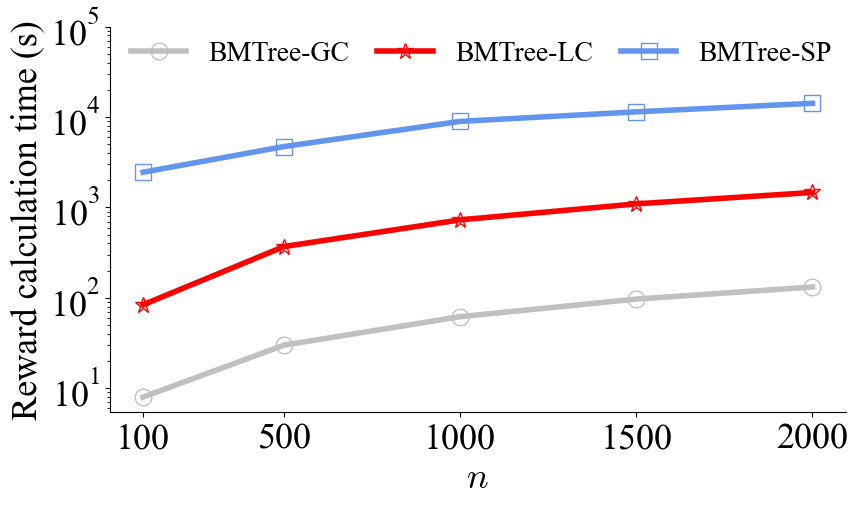

In [20]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# plt.style.use('seaborn')  # Use the 'seaborn' style


# Dataset sizes and time saved scores
dataset_sizes = [100, 500, 1000, 1500, 2000]

BMTree_GC = [8, 30, 62, 97, 132] # Method B
BMTree_LC = [84, 370, 730, 1097, 1467] # Method B
BMTree_SP = [2456, 4725, 8966, 11438, 14221] # Method A

all_methods = [
    BMTree_GC,
    BMTree_LC,
    BMTree_SP,
]



labels = ['BMTree-GC', 'BMTree-LC', 'BMTree-SP']

# Set up figure and axes
fig, ax = plt.subplots(figsize=(9.5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# Font sizes
title_fontsize = 26
label_fontsize = 26
tick_fontsize = 26
annotation_fontsize = 16

for i in range(len(all_methods)):
#     line1, = ax.plot(dataset_sizes, all_methods[i], marker=markers[i], label=labels[i], color=colors[i],
#                     linewidth=linewidth, markersize=markersize)
    line1, = ax.plot(dataset_sizes, all_methods[i], linewidth=linewidth, markersize=markersize,
        color=colors[i], marker=markers[i], label=labels[i],markeredgewidth=1, markerfacecolor='none')
    # Annotate data points for Method A
#     for x, y in zip(dataset_sizes, all_methods[i]):
#         ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10,-15), ha='center', fontsize=annotation_fontsize, color=colors[i])

# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$n$', fontsize=label_fontsize)
ax.set_ylabel('Reward calculation time (s)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=title_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)
ax.set_xticks(dataset_sizes)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)
ax.set_xticklabels([str(size) for size in dataset_sizes], fontsize=tick_fontsize)
# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)
# ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0, ncol=3)
ax.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)


plt.savefig('../figs/exp2/vary_query_num_time.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


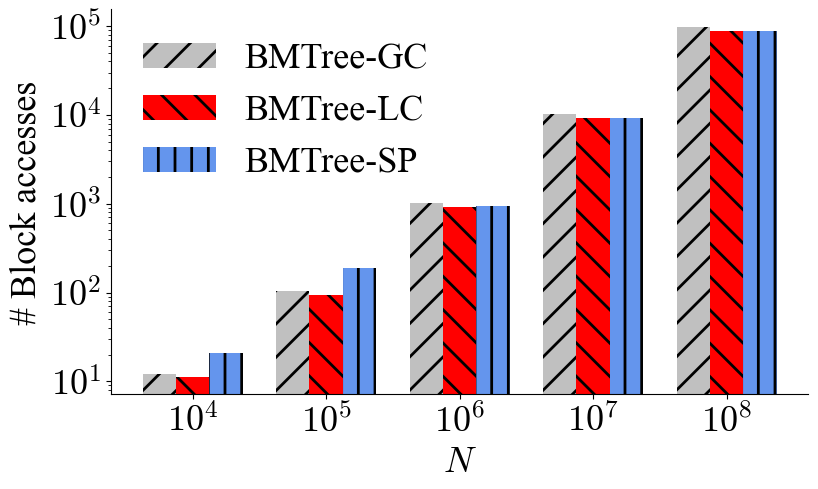

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]
dataset_sizes = [10000, 100000, 1000000, 10000000, 100000000]

BMTree_GC = [12.1225, 103.236, 1011.6425, 10111.84 , 97960.0035] # Global
BMTree_LC = [11.2095, 94.046, 922.3195 , 9200.0045, 89120.853] # Local
BMTree_SP = [20.661, 186.415, 948, 9226.007, 89189] # BMTree

all_methods = [
    BMTree_GC,
    BMTree_LC,
    BMTree_SP
]

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(9, 5))

# Width of the bars
width = 0.25
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(dataset_sizes))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

rs = [r1, r2, r3]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, label=labels[i], hatch=patterns[i], alpha=bar_alpha, color=colors[i])
    patterns

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$N$', fontsize=label_fontsize)
ax.set_ylabel('# Block accesses', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + width for r in range(len(dataset_sizes))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)
ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0)

plt.savefig('../figs/exp2/vary_datasize_query.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


### Figure 3. Varying query num block access

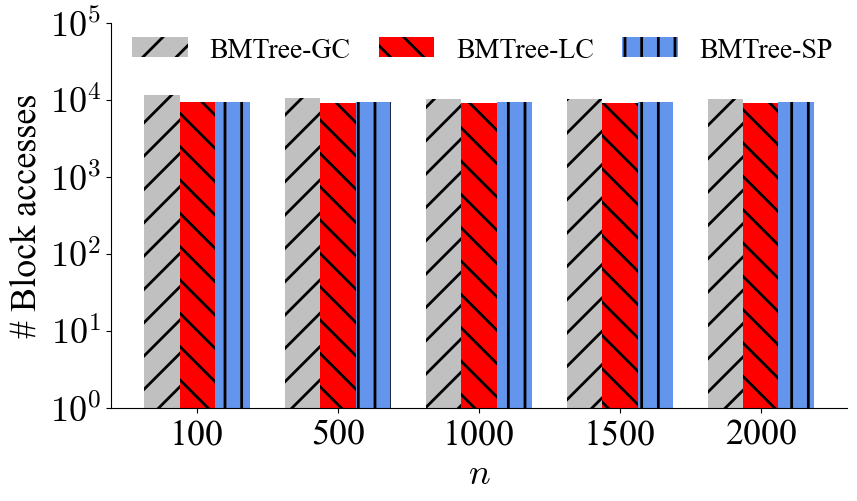

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]

dataset_sizes = [100, 500, 1000, 1500, 2000]

BMTree_GC = [11638, 10462, 10111, 10237, 10255] # Method B
BMTree_LC = [9205, 9199, 9200, 9199, 9199] # Method B
BMTree_SP = [9356, 9261, 9226, 9248, 9259] # Method A


all_methods = [
    BMTree_GC,
    BMTree_LC,
    BMTree_SP
]

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(9.5, 5))

# Width of the bars
width = 0.25
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(dataset_sizes))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

rs = [r1, r2, r3]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
#     rects1 = ax.bar(rs[i], all_methods[i], width, label=labels[i], alpha=bar_alpha, color=colors[i])
    rects1 = ax.bar(rs[i], all_methods[i], width,hatch=patterns[i], label=labels[i], alpha=bar_alpha, color=colors[i])

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$n$', fontsize=label_fontsize)
ax.set_ylabel('# Block accesses', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + width for r in range(len(dataset_sizes))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
ax.set_xticklabels([str(size) for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [1, 10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)
ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0)
ax.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)


plt.savefig('../figs/exp2/vary_query_num_query.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


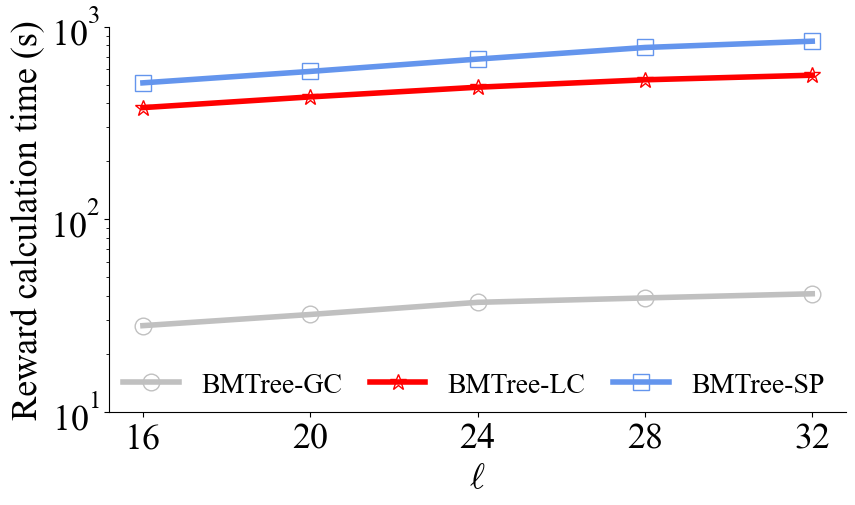

In [7]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# plt.style.use('seaborn')  # Use the 'seaborn' style


# Dataset sizes and time saved scores
dataset_sizes = [16, 20, 24, 28, 32]

BMTree_GC = [28, 32, 37, 39, 41] 
BMTree_LC = [380, 432, 485, 530, 560] 
BMTree_SP = [511, 586, 679, 780, 841] 


all_methods = [
    BMTree_GC,
    BMTree_LC,
    BMTree_SP,
]



labels = ['BMTree-GC', 'BMTree-LC', 'BMTree-SP']

# Set up figure and axes
fig, ax = plt.subplots(figsize=(9.5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# Font sizes
title_fontsize = 26
label_fontsize = 26
tick_fontsize = 26
annotation_fontsize = 16

for i in range(len(all_methods)):
#     line1, = ax.plot(dataset_sizes, all_methods[i], marker=markers[i], label=labels[i], color=colors[i],
#                     linewidth=linewidth, markersize=markersize)
    line1, = ax.plot(dataset_sizes, all_methods[i], linewidth=linewidth, markersize=markersize,
        color=colors[i], marker=markers[i], label=labels[i],markeredgewidth=1, markerfacecolor='none')
    # Annotate data points for Method A
#     for x, y in zip(dataset_sizes, all_methods[i]):
#         ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10,-15), ha='center', fontsize=annotation_fontsize, color=colors[i])

# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\ell$', fontsize=label_fontsize)
ax.set_ylabel('Reward calculation time (s)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=title_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [10, 100, 1000]
ax.set_yticks(y_labels)
ax.set_xticks(dataset_sizes)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)
ax.set_xticklabels([str(size) for size in dataset_sizes], fontsize=tick_fontsize)
# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)
# ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0, ncol=3)
ax.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)


plt.savefig('../figs/exp2/vary_bits_time.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


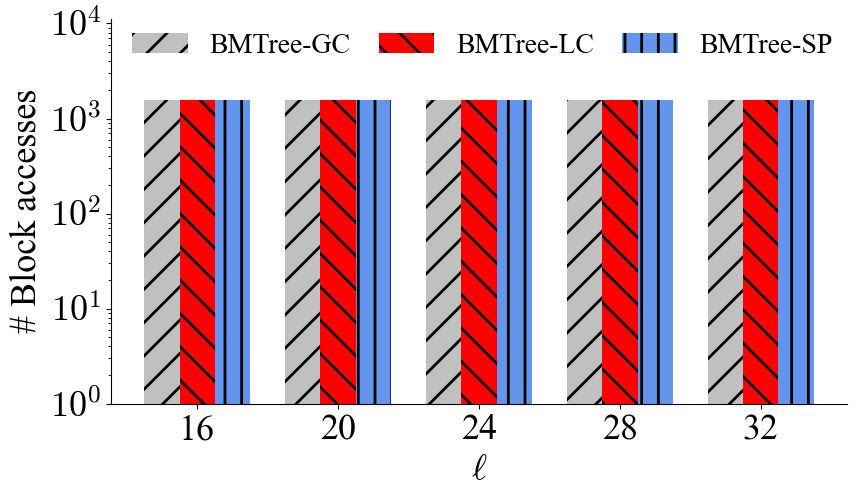

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]

dataset_sizes = [16, 20, 24, 28, 32]

BMTree_GC = [1565, 1565, 1565, 1565, 1565] 
BMTree_LC = [1565, 1565, 1565, 1565, 1565] 
BMTree_SP = [1565, 1565, 1565, 1565, 1565] 

all_methods = [
    BMTree_GC,
    BMTree_LC,
    BMTree_SP
]

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(9.5, 5))

# Width of the bars
width = 0.25
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(dataset_sizes))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

rs = [r1, r2, r3]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
#     rects1 = ax.bar(rs[i], all_methods[i], width, label=labels[i], alpha=bar_alpha, color=colors[i])
    rects1 = ax.bar(rs[i], all_methods[i], width,hatch=patterns[i], label=labels[i], alpha=bar_alpha, color=colors[i])

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\ell$', fontsize=label_fontsize)
ax.set_ylabel('# Block accesses', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + width for r in range(len(dataset_sizes))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
ax.set_xticklabels([str(size) for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [1, 10, 100, 1000, 10000]
ax.set_yticks(y_labels)
ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0)
ax.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)


plt.savefig('../figs/exp2/vary_bits_query.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


###  Figure 5. Varying depth and sampling rate.

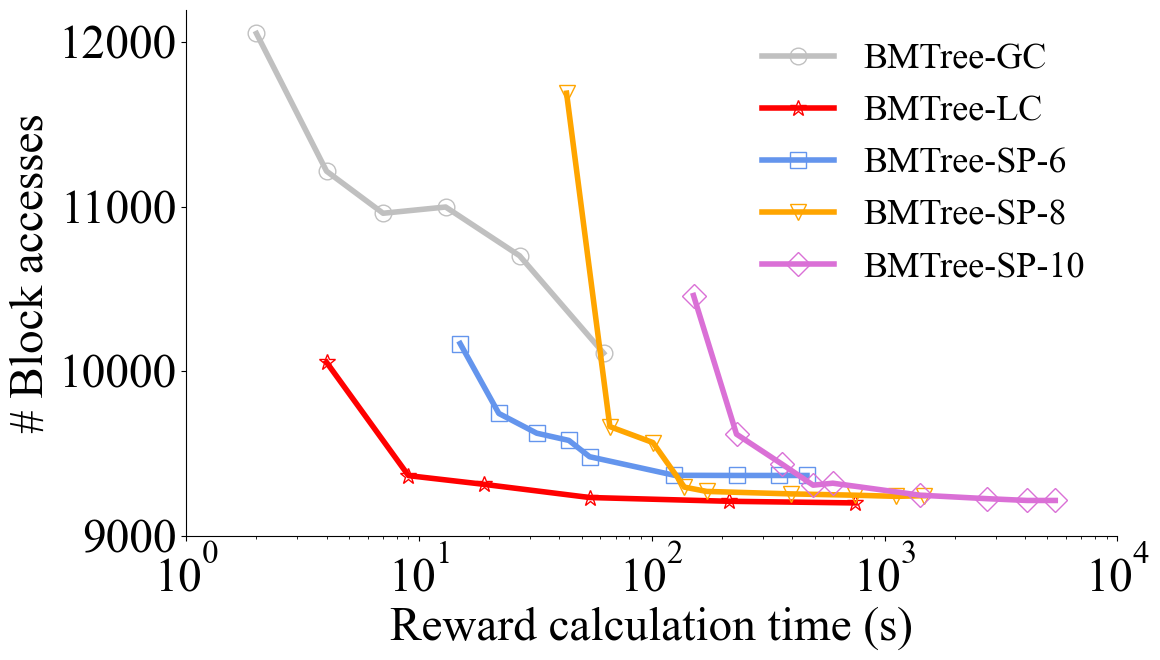

In [9]:
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
# plt.style.use("seaborn")  # Use the 'seaborn' style


labels = [
          'BMTree-GC', 
          'BMTree-LC',
#           'BMTree-SP-4',
          'BMTree-SP-6',
          'BMTree-SP-8',
          'BMTree-SP-10'
         ]

# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']

# training_time = [
#     [18, 52, 110, 247, 496, 1010, 2040],
#     [20, 54, 128, 278, 681, 1690, 4162],
#     [4, 10, 13, 18, 22, 51, 89, 133, 176],
#     [59, 66, 78, 90, 102, 171, 280, 402, 515],
#     [266, 296, 324, 369, 401, 620, 969, 1351, 1704],
#     [1090, 1197, 1307, 1450, 1558, 2376, 3689, 5049, 5411]
# ]

training_time = [
#     [2, 4, 7, 13, 27, 62, 140], # from h = 5
#     [4, 9, 19, 54, 214, 747, 2286],
    
    [2, 4, 7, 13, 27, 62], # from h = 5
    [4, 9, 19, 54, 214, 747],
    
#     [4, 10, 12, 17, 22, 50, 87, 130, 171],
    [15, 22, 32, 44, 54, 125, 232, 352, 464],
    [43, 66, 101, 138, 172, 395, 744, 1122, 1470],
    [151, 231, 364, 493, 599, 1423, 2747, 4096, 5411]
]


block_access = [
#     [12054, 11217, 10961, 10999, 10703, 10111, 9811],
#     [10055, 9366, 9313, 9233, 9210, 9200, 9202],
    [12054, 11217, 10961, 10999, 10703, 10111],
    [10055, 9366, 9313, 9233, 9210, 9200],
#     [11249, 9935, 9962, 9919, 9919, 9918, 9918, 9919, 9918],
    [10169, 9744, 9624, 9580, 9481, 9368, 9367, 9367, 9367],
    [11691, 9664, 9567, 9296, 9270, 9255, 9247, 9240, 9244],
    [10461, 9618, 9434, 9308, 9320, 9247, 9226, 9215, 9215]
]

annotation = [
    [0.0001, 0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005, 0.0075, 0.01],
    [5,6,7,8,9,10,11,12],
    [5,6,7,8,9,10,11,12],
]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Font sizes
# title_fontsize = 20
# label_fontsize = 20
# tick_fontsize = 20
# annotation_fontsize = 10
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Colors
color_A = "blue"
color_B = "green"

# Plot time saved comparison chart
for i in range(len(training_time)):
#     ax.scatter(training_time[i], block_access[i], color=colors[i])
    ax.plot(training_time[i], block_access[i], linewidth=linewidth, markersize=markersize,
            color=colors[i], marker=markers[i], label=labels[i], markeredgewidth=1, markerfacecolor='none')
    


#     for j in range(len(training_time[i])):
#         dis = r'$\alpha={}$'.format(annotation[i][j]) if i == 0 else 'depth={}'.format(annotation[i][j])
#         x = training_time[i][j]
#         y = block_access[i][j]
#         ax.annotate(
#             dis,
#             (x, y),
#             textcoords="offset points",
#             xytext=(-10, -15),
#             ha="center",
#             fontsize=annotation_fontsize,
#             color=colors[i],
#         )

# plt.plot(172, 9270, marker='*', markersize=25, linestyle='', color='black')

ax.set_xscale('log')
# ax.set_yscale("log")
ax.set_ylabel("# Block accesses", fontsize=label_fontsize+ 8)
ax.set_xlabel("Reward calculation time (s)", fontsize=label_fontsize+ 8)
# ax.set_title("Time Saved Comparison of Methods A and B (OSM)", fontsize=title_fontsize)

y_labels = [9000, 10000, 11000, 12000]
ax.set_yticks(y_labels)

# Set tick font sizes
ax.tick_params(axis="both", which="major", labelsize=tick_fontsize+ 8)
# ax.legend(fontsize=tick_fontsize)

ax.set_xticks([1,10,100, 1000, 10000])

# plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1), fancybox=True, framealpha=0)
plt.legend(fontsize=tick_fontsize, bbox_to_anchor=(1, 1), fancybox=True, framealpha=0)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('../figs/exp2/vary_depth_sample_rate_OSM_from_h6.pdf',format='pdf',bbox_inches = 'tight')

plt.show()

ax.tick_params(axis="y", which="major", labelsize=tick_fontsize)


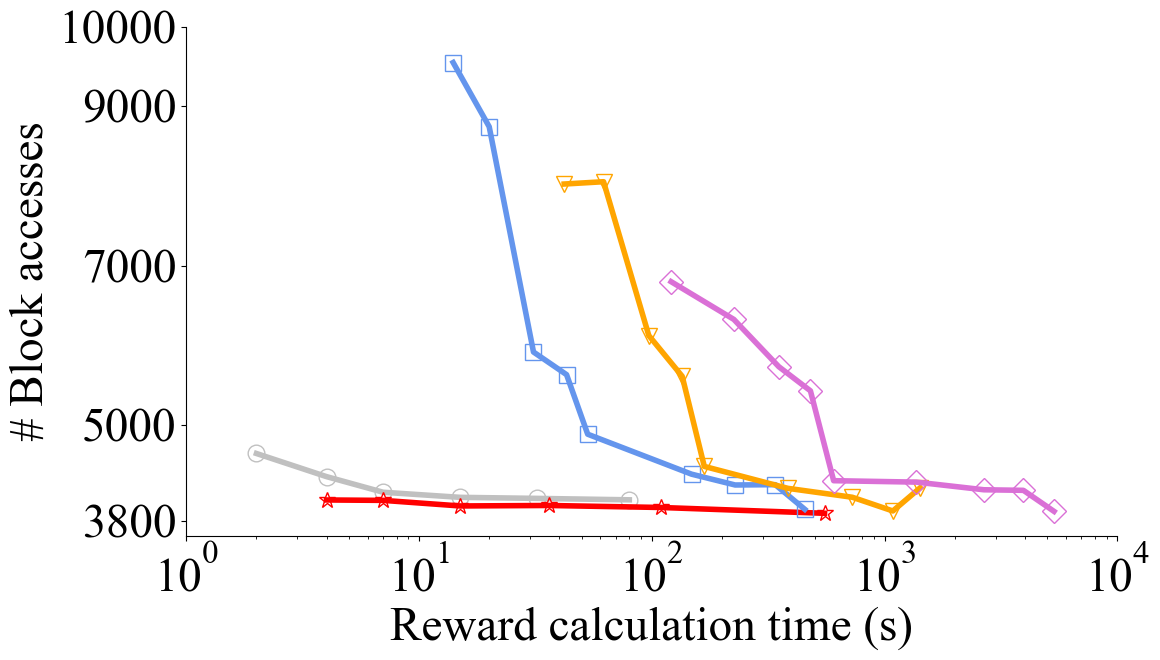

In [10]:
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
# plt.style.use("seaborn")  # Use the 'seaborn' style


labels = [
          'BMTree-GC', 
          'BMTree-LC',
#           'BMTree-SP-4',
          'BMTree-SP-6',
          'BMTree-SP-8',
          'BMTree-SP-10', 
]

# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']

# training_time = [
        
#     [18, 49, 114, 238, 496, 1039],
    
#     [20, 54, 128, 278, 681, 1482],
    
#     [7, 8, 11, 15, 25, 81, 110, 177, 190],
    
#     [60, 66, 74, 87, 103, 190, 278, 398, 517],
    
#     [258, 284, 317, 346, 398, 622, 1025, 1303, 1646],
    
#     [955, 1151, 1268, 1387, 1532, 2315, 3598, 4817, 6143]
    

# ]

training_time = [
        
#     [2, 4, 7, 15, 32, 80, 188], # from 5
    
#     [4, 7, 15, 36, 109, 552, 1182],
     [2, 4, 7, 15, 32, 80], # from 5
    
    [4, 7, 15, 36, 109, 552],
    
#     [6, 8, 12, 17, 21, 49, 90, 126, 169],
    
    [14, 20, 31, 43, 53, 148, 228, 339, 454],
    
    [42, 62, 97, 135, 168, 384, 727, 1085, 1422],
    
    [121, 225, 351, 480, 604, 1370, 2672, 3948, 5346]
    

]

block_access = [
    
#     [4644, 4354, 4158, 4094, 4081, 4063, 4046],
    
#     [4061, 4056, 3986, 3992, 3967, 3894, 4117],
    
    [4644, 4354, 4158, 4094, 4081, 4063],
    
    [4061, 4056, 3986, 3992, 3967, 3894],
    
#     [9643, 9640, 7657, 5752, 5749, 4798, 4051, 4051, 4048],
    
    [9548, 8743, 5917, 5633, 4886, 4385, 4249, 4253, 3944],
    
    [8024, 8053, 6124, 5612, 4482, 4207, 4095, 3923, 4214],
    
    [6799, 6326, 5733, 5430, 4303, 4285, 4189, 4182, 3918]
]

annotation = [
    [0.0001, 0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005, 0.0075, 0.01],
    [5,6,7,8,9,10,11,12],
    [5,6,7,8,9,10,11,12],
]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Font sizes
# title_fontsize = 20
# label_fontsize = 20
# tick_fontsize = 20
# annotation_fontsize = 10

# Colors
color_A = "blue"
color_B = "green"

# Plot time saved comparison chart
for i in range(len(training_time)):
#     ax.scatter(training_time[i], block_access[i], color=colors[i])
    ax.plot(training_time[i], block_access[i], linewidth=linewidth, markersize=markersize,
            color=colors[i], marker=markers[i], label=labels[i],markeredgewidth=1, markerfacecolor='none')

#     for j in range(len(training_time[i])):
#         dis = r'$\alpha={}$'.format(annotation[i][j]) if i == 0 else 'depth={}'.format(annotation[i][j])
#         x = training_time[i][j]
#         y = block_access[i][j]
#         ax.annotate(
#             dis,
#             (x, y),
#             textcoords="offset points",
#             xytext=(-10, -15),
#             ha="center",
#             fontsize=annotation_fontsize,
#             color=colors[i],
#         )

# plt.plot(168, 4482, marker='*', markersize=25, linestyle='', color='black')


ax.set_xscale('log')
# ax.set_yscale("log")
ax.set_ylabel("# Block accesses", fontsize=label_fontsize + 8)
ax.set_xlabel("Reward calculation time (s)", fontsize=label_fontsize + 8)
# ax.set_title("Time Saved Comparison of Methods A and B (OSM)", fontsize=title_fontsize)

y_labels = [3800, 5000, 7000, 9000, 10000]
ax.set_yticks(y_labels)

# Set tick font sizes
ax.tick_params(axis="both", which="major", labelsize=tick_fontsize+ 8)
# ax.legend(fontsize=tick_fontsize)

ax.set_xticks([1,10,100, 1000, 10000])

# plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1), fancybox=True, framealpha=0)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('../figs/exp2/vary_depth_sample_rate_SKEW_from_h6.pdf',format='pdf',bbox_inches = 'tight')

plt.show()

ax.tick_params(axis="y", which="major", labelsize=tick_fontsize)

###  Figure 6. Using 4  dataset cardinality. report query time cost

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Dataset sizes and time saved scores
# # dataset_sizes = [1, 10, 100, 1000, 10000]
# x_labels = ["OSM", "NYC", "UNI", "SKEW"]

# BMTree = [0, 0, 0, 0] # Global
# LBMC = [0, 0, 0, 0]
# LC = [0, 0, 0, 0]
# ZC = [0, 0, 0, 0]
# HC = [0, 0, 0, 0]
# QUILTS = [0, 0, 0, 0]

# labels = ['BMTree', 'LBMC', 'QUILTS']
# labels = ['BMTree', 'LBMC']

# all_methods = time_cost_res

# # Define color and font size variables
# color_A = 'blue'
# color_B = 'orange'
# bar_alpha = 0.5


# # Set up figure and axes
# fig, ax = plt.subplots(figsize=(9, 5))
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# # Width of the bars
# width = 0.12

# # Create an array with the position of each bar along the x-axis
# r1 = np.arange(len(x_labels))
# r2 = [x + width for x in r1]
# r3 = [x + width for x in r2]

# rs = [r1, r2, r3]


# for i in range(len(all_methods)):
# # Plot time saved comparison chart with semi-transparent bars
#     rects1 = ax.bar(rs[i], all_methods[i], width,hatch=patterns[i], label=labels[i], alpha=bar_alpha, color=colors[i])

# #     for rect in rects1:
# #         height = rect.get_height()
# #         ax.annotate(f'{height}',
# #                     xy=(rect.get_x() + rect.get_width() / 2, height),
# #                     xytext=(0, 3),  # 3 points vertical offset
# #                     textcoords="offset points",
# #                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_yscale('log')
# ax.set_xlabel('Dataset', fontsize=label_fontsize)
# ax.set_ylabel('Build time (s)', fontsize=label_fontsize)
# # ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
# ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
# # ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
# # ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# # Set tick font sizes
# ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


# ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

# ax.set_ylim(1, 1000)
# y_labels = [1, 10, 100, 1000]
# ax.set_yticks(y_labels)

# # ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

# # ax.legend(fontsize=tick_fontsize)

# # Place legend to the right of the plot
# # plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1))

# plt.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)


# # Adjust the layout to make room for the legend
# plt.tight_layout()

# plt.savefig('../figs/exp2/varying_dataset_build_time.pdf',format='pdf',bbox_inches = 'tight')    

# plt.show()


NameError: name 'time_cost_res' is not defined

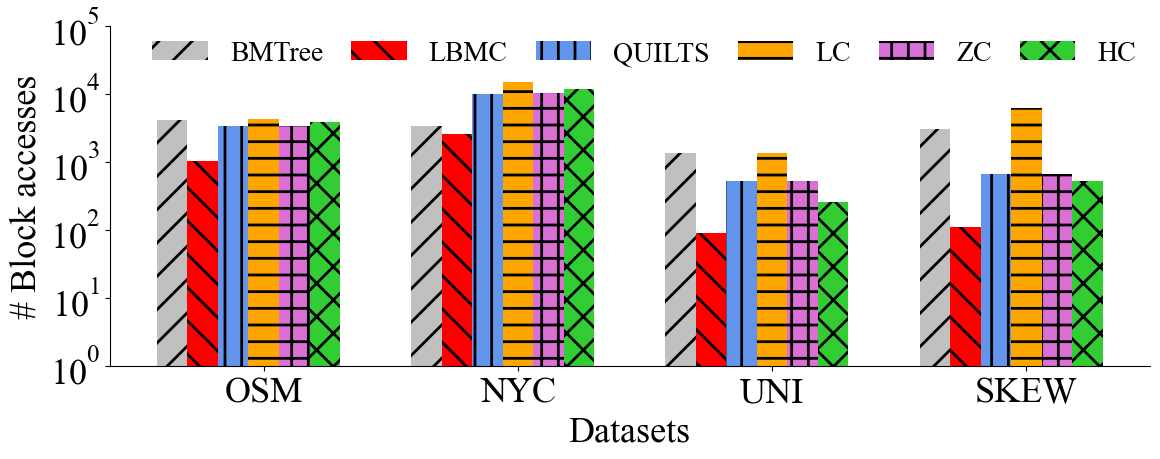

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]
x_labels = ["OSM", "NYC", "UNI", "SKEW"]




labels = ['BMTree', 'LBMC', 'QUILTS', 'LC', 'ZC', 'HC']

# all_methods = block_access_res
all_methods = [[4131.9775, 3448.5455, 1382.1845, 3084.0195], [1044.282, 2638.4455, 90.232, 111.12], [3408.853, 10187.0045, 529.5425, 674.9055000000001], [4319.9695, 15320.6085, 1384.219, 6268.5435], [3466.3275, 10525.5775, 529.604, 670.5635], [3959.788, 11933.504, 260.2555, 528.0605]]

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Width of the bars
width = 0.12

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(x_labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]
r7 = [x + width for x in r6]

rs = [r1, r2, r3, r4, r5, r6]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, hatch=patterns[i],label=labels[i], alpha=bar_alpha, color=colors[i])

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


ax.set_yscale('log')
ax.set_xlabel('Datasets', fontsize=label_fontsize)
ax.set_ylabel('# Block accesses', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

ax.set_ylim(1, 100000)
y_labels = [1, 10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)

# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

# ax.legend(fontsize=tick_fontsize)

# Place legend to the right of the plot
# plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1))
plt.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('../figs/exp2/varying_dataset_block_access.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


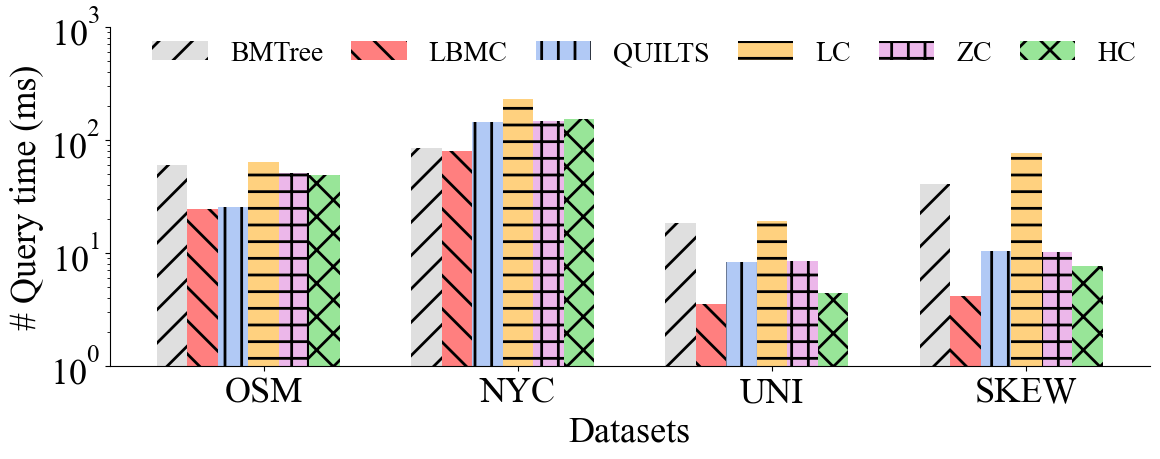

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]
x_labels = ["OSM", "NYC", "UNI", "SKEW"]




labels = ['BMTree', 'LBMC', 'QUILTS', 'LC', 'ZC', 'HC']

# all_methods = block_access_res
all_methods = [[59.91487407684326, 83.77195656299591, 18.34114706516266, 40.216957092285156], [24.499074935913086, 78.82441592216492, 3.5092984437942505, 4.180159091949463], [25.277619242668152, 141.9449987411499, 8.33948826789856, 10.303467154502869], [63.348712682724, 227.94348347187042, 19.03329312801361, 75.685919880867], [50.94866347312927, 145.49891531467438, 8.411270499229431, 10.21720564365387], [48.90392446517944, 152.11083149909973, 4.366873860359192, 7.588052868843079]]

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 0.5


# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Width of the bars
width = 0.12

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(x_labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]
r7 = [x + width for x in r6]

rs = [r1, r2, r3, r4, r5, r6]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, hatch=patterns[i],label=labels[i], alpha=bar_alpha, color=colors[i])

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


ax.set_yscale('log')
ax.set_xlabel('Datasets', fontsize=label_fontsize)
ax.set_ylabel('# Query time (ms)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

ax.set_ylim(1, 1000)
y_labels = [1, 10, 100, 1000]
ax.set_yticks(y_labels)

# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

# ax.legend(fontsize=tick_fontsize)

# Place legend to the right of the plot
# plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1))
plt.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('../figs/exp2/varying_dataset_query_time.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


In [25]:
block_access_res, time_cost_res = fig_2()
print(block_access_res)
print(time_cost_res)

{'OSM': [[None, None, None, None, None], [4.0169999999999995, 13.396, 108.0395, 1044.282, 10041.9195], [6.354, 37.139, 344.713, 3408.853, 32858.988], [7.2885, 46.218, 435.648, 4319.9695, 41636.6945], [6.4115, 37.683, 350.53950000000003, 3466.3275, 33413.8745], [6.433, 42.081500000000005, 399.316, 3959.788, 38176.3675]], 'SKEW': [[None, None, None, None, None], [3.093, 4.0745000000000005, 14.6965, 111.12, 1075.9424999999999], [3.6235, 9.705, 71.012, 674.9055000000001, 6710.307], [3.093, 4.0745000000000005, 14.6965, 6268.5435, 1075.9425], [3.617, 9.645000000000001, 70.586, 670.5635, 6666.2605], [2.984, 7.7825, 55.9015, 528.0605, 5245.8435]]}
{'OSM': [[None, None, None, None, None], [15.188806772232056, 15.182976722717285, 15.119736433029175, 14.988156795501709, 15.121316194534302]], 'SKEW': [[None, None, None, None, None], [15.081965208053589, 15.10465121269226, 15.244285583496094, 15.126515865325928, 15.025647401809692]]}


In [15]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# plt.style.use('seaborn')  # Use the 'seaborn' style


# Dataset sizes and time saved scores
dataset_sizes = [10000, 100000, 1000000, 10000000, 100000000]

BMTree = [0, 0, 0, 0, 0] # Global
LBMC = [0, 0, 0, 0, 0]
QUILTS = [0, 0, 0, 0, 0]

# labels = ['BMTree', 'LBMC', 'QUILTS']
labels = ['BMTree', 'LBMC']

all_methods = time_cost_res['OSM']

# Set up figure and axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    


for i in range(len(all_methods)):
#     line1, = ax.plot(dataset_sizes, all_methods[i], marker=markers[i], label=labels[i], color=colors[i],
#                     linewidth=linewidth, markersize=markersize)
    line1, = ax.plot(dataset_sizes, all_methods[i], linewidth=linewidth, markersize=markersize,
        color=colors[i], marker=markers[i], label=labels[i],markeredgewidth=1, markerfacecolor='none')

    # Annotate data points for Method A
#     for x, y in zip(dataset_sizes, all_methods[i]):
#         ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10,-15), ha='center', fontsize=annotation_fontsize, color=colors[i])

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Cardinality', fontsize=label_fontsize)
ax.set_ylabel('Time (s)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=title_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)
ax.set_xticks(dataset_sizes)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)
ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)
ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)
# ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0)
plt.legend(ncol=3, labelspacing=0.0, columnspacing=0.5, borderpad=0, handlelength=1, fancybox=True, framealpha=0)


plt.savefig('../figs/exp2/vary_cardinality_time.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


NameError: name 'time_cost_res' is not defined

[[6.6305, 22.9195, 421.7715, 4131.9775, 20219.352], [4.0169999999999995, 13.396, 108.0395, 1044.282, 10041.9195], [6.354, 37.139, 344.713, 3408.853, 32858.988], [7.2885, 46.218, 435.648, 4319.9695, 41636.6945], [6.4115, 37.683, 350.53950000000003, 3466.3275, 33413.8745], [6.433, 42.081500000000005, 399.316, 3959.788, 38176.3675]]


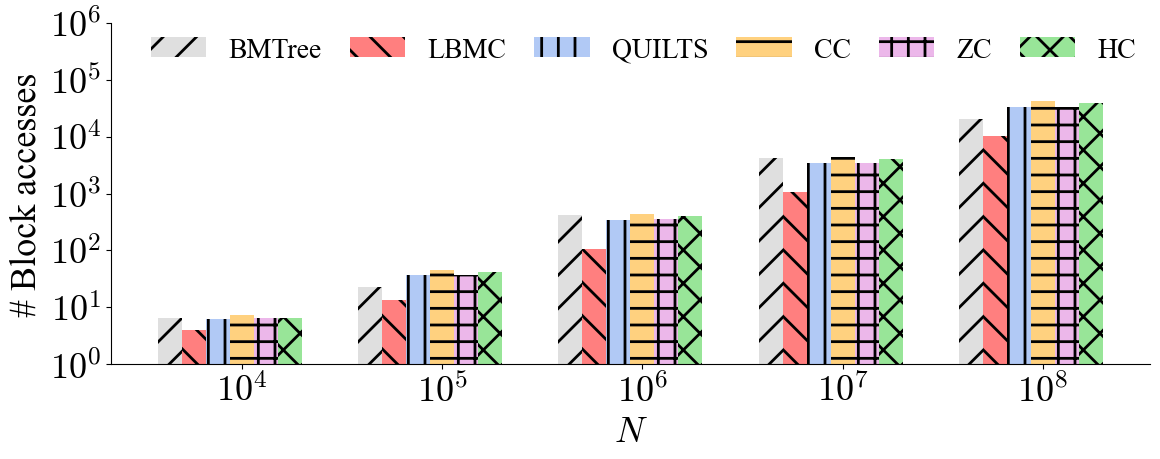

In [16]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# plt.style.use('seaborn')  # Use the 'seaborn' style


# Dataset sizes and time saved scores
dataset_sizes = [10000, 100000, 1000000, 10000000, 100000000]

x_labels = ['$10^4$','$10^5$','$10^6$', '$10^7$', '$10^8$']


labels = ['BMTree', 'LBMC', 'QUILTS', 'CC', 'ZC', 'HC']



# all_methods = block_access_res['OSM']

all_methods =[[6.6305, 22.9195, 421.7715, 4131.9775, 20219.352], [4.0169999999999995, 13.396, 108.0395, 1044.282, 10041.9195], [6.354, 37.139, 344.713, 3408.853, 32858.988], [7.2885, 46.218, 435.648, 4319.9695, 41636.6945], [6.4115, 37.683, 350.53950000000003, 3466.3275, 33413.8745], [6.433, 42.081500000000005, 399.316, 3959.788, 38176.3675]]

print(all_methods)


# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Width of the bars
width = 0.12

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(x_labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]
r7 = [x + width for x in r6]

rs = [r1, r2, r3, r4, r5, r6]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, hatch=patterns[i],label=labels[i], alpha=bar_alpha, color=colors[i])


# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$N$', fontsize=label_fontsize)
ax.set_ylabel('# Block accesses', fontsize=label_fontsize)
ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
ax.set_xticklabels(x_labels, fontsize=tick_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [1, 10, 100, 1000, 10000, 100000, 1000000]
ax.set_yticks(y_labels)
# ax.set_xticks(dataset_sizes)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)
ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)
# ax.legend(fontsize=tick_fontsize, fancybox=True, framealpha=0)
# plt.legend(ncol=3, labelspacing=0.0, columnspacing=0.5, borderpad=0, handlelength=1, fancybox=True, framealpha=0)
plt.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)
plt.tight_layout()

plt.savefig('../figs/exp2/vary_cardinality_block_access.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


In [21]:
block_access_res, time_cost_res = fig_3()
print(block_access_res)
print(time_cost_res)

{'OSM': [[6648.1875, 3580.648, 1061.752, 1151.6725000000001, 4131.9775], [290.155, 283.4985, 510.507, 1057.1795, 1044.282], [5300.2615, 1488.4370000000001, 510.507, 1271.9, 3408.853], [920.155, 855.0405, 1055.1705, 1151.6109999999999, 4319.9695], [5371.088, 1497.331, 510.507, 1270.352, 3466.3275], [3951.8925, 1270.4665, 632.762, 1330.265, 3959.788]], 'SKEW': [[None, None, None, None, 3084.0195], [685.672, 709.6990000000001, 119.27250000000001, 110.1275, 111.12], [1662.858, 388.112, 118.9705, 280.59000000000003, 674.9055000000001], [685.672, 709.6990000000001, 705.279, 2101.327, 6268.5435], [1655.3525, 387.099, 118.9705, 280.43399999999997, 670.5635], [1631.5885, 328.46950000000004, 118.4365, 269.6195, 528.0605]]}
{'OSM': [[388.1954936981201, 385.94884610176086, 388.24603366851807, 393.11217403411865, 392.5836093425751], [14.954736471176147, 15.46780276298523, 154.01507925987244, 15.685919046401978, 14.988156795501709]], 'SKEW': [[None, None, None, None, 392.53429889678955], [15.1781466

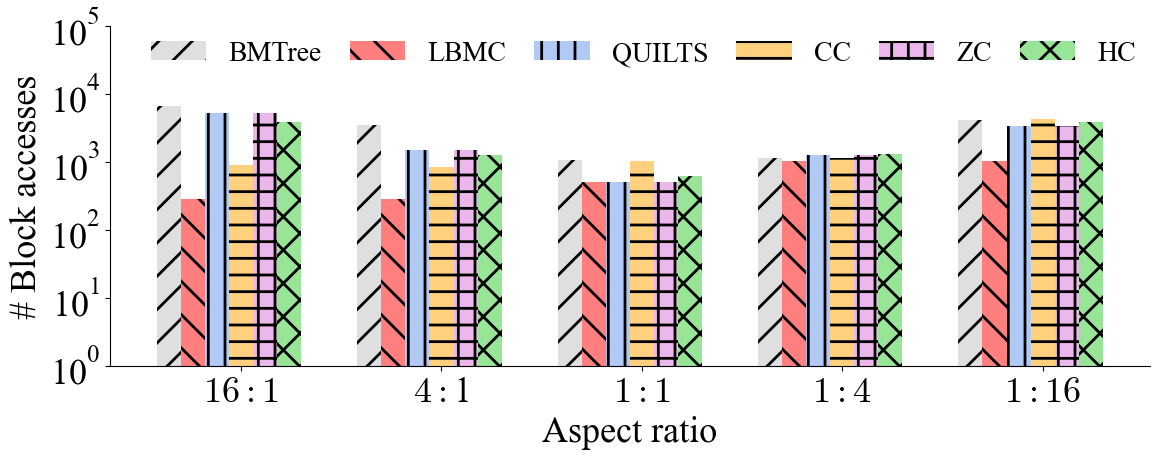

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]
x_labels = ['$16:1$','$4:$1','$1:1$', '$1:4$', '$1:16$']


labels = ['BMTree', 'LBMC', 'QUILTS', 'CC', 'ZC', 'HC']

# all_methods = block_access_res['OSM']

all_methods = [[6648.1875, 3580.648, 1061.752, 1151.6725000000001, 4131.9775], [290.155, 283.4985, 510.507, 1057.1795, 1044.282], [5300.2615, 1488.4370000000001, 510.507, 1271.9, 3408.853], [920.155, 855.0405, 1055.1705, 1151.6109999999999, 4319.9695], [5371.088, 1497.331, 510.507, 1270.352, 3466.3275], [3951.8925, 1270.4665, 632.762, 1330.265, 3959.788]]

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 0.5


# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Width of the bars
width = 0.12

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(x_labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]
r7 = [x + width for x in r6]

rs = [r1, r2, r3, r4, r5, r6]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, hatch=patterns[i],label=labels[i], alpha=bar_alpha, color=colors[i])

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


ax.set_yscale('log')
ax.set_xlabel('Aspect ratio', fontsize=label_fontsize)
ax.set_ylabel('# Block accesses', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

ax.set_ylim(1, 100000)
y_labels = [1, 10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)

# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

# ax.legend(fontsize=tick_fontsize)

# Place legend to the right of the plot
# plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1))
plt.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('../figs/exp2/varying_skewness_block_access.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


In [23]:
block_access_res, time_cost_res = fig_4()
print(block_access_res)
print(time_cost_res)

{'OSM': [[1121.6879999999999, 2160.9815, 4131.9775, 7467.9385, 7455.2315], [273.897, 554.6555000000001, 1044.282, 2072.1014999999998, 3947.012], [977.118, 1784.7495, 3408.853, 6161.617, 11389.1415], [1127.0885, 2218.4395, 4319.9695, 8223.2295, 14679.5275], [980.2995000000001, 1791.208, 3466.3275, 6356.4655, 11944.41], [1182.4569999999999, 2294.496, 3959.788, 6575.2925, 15533.699999999999]], 'SKEW': [[None, None, 3084.0195, None, None], [30.369500000000002, 57.319, 111.12, 217.1875, 428.629], [158.389, 297.9095, 674.9055000000001, 1307.9305, 2759.8325], [2250.935, 3687.739, 6268.5435, 10785.689, 16847.954], [158.215, 297.0195, 670.5635, 1300.138, 2731.8695000000002], [212.2725, 267.457, 528.0605, 1072.8255, 2174.5945]]}
{'OSM': [[382.5438711643219, 387.12758231163025, 392.5836093425751, 400.24936532974243, 394.2741479873657], [15.028849124908447, 15.409514904022217, 14.988156795501709, 15.276495218276978, 15.032955169677734]], 'SKEW': [[None, None, 392.53429889678955, None, None], [15.2

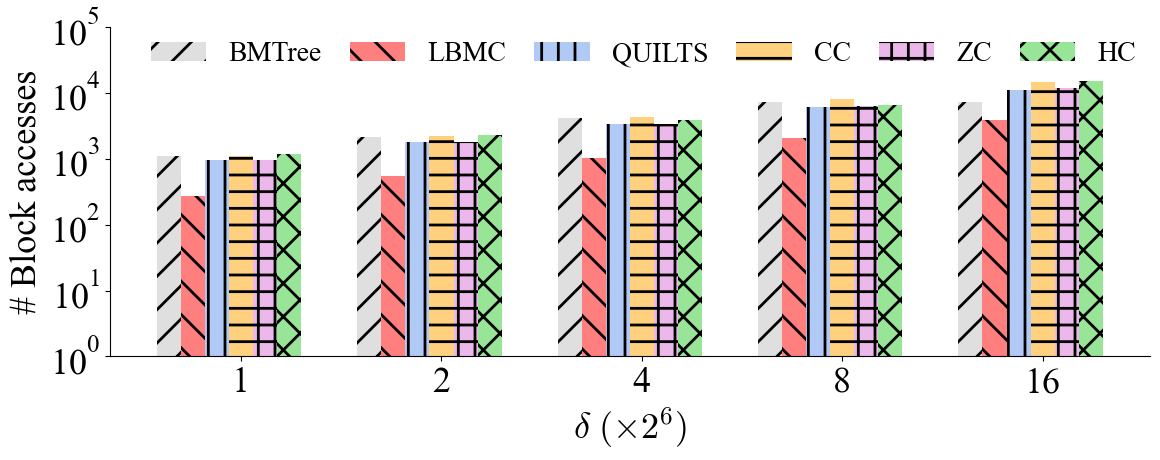

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]
x_labels = ['1','2','4', '8', '16']


labels = ['BMTree', 'LBMC', 'QUILTS', 'CC', 'ZC', 'HC']

# all_methods = block_access_res['OSM']

all_methods = [[1121.6879999999999, 2160.9815, 4131.9775, 7467.9385, 7455.2315], [273.897, 554.6555000000001, 1044.282, 2072.1014999999998, 3947.012], [977.118, 1784.7495, 3408.853, 6161.617, 11389.1415], [1127.0885, 2218.4395, 4319.9695, 8223.2295, 14679.5275], [980.2995000000001, 1791.208, 3466.3275, 6356.4655, 11944.41], [1182.4569999999999, 2294.496, 3959.788, 6575.2925, 15533.699999999999]]

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 0.5


# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Width of the bars
width = 0.12

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(x_labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]
r7 = [x + width for x in r6]

rs = [r1, r2, r3, r4, r5, r6]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, hatch=patterns[i],label=labels[i], alpha=bar_alpha, color=colors[i])

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


ax.set_yscale('log')
ax.set_xlabel('$\delta$' + ' $(\\times 2^{6})$', fontsize=label_fontsize)
ax.set_ylabel('# Block accesses', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

ax.set_ylim(1, 100000)
y_labels = [1, 10, 100, 1000, 10000, 100000]
ax.set_yticks(y_labels)

# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

# ax.legend(fontsize=tick_fontsize)

# Place legend to the right of the plot
# plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1))
plt.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('../figs/exp2/varying_selectivity_block_access.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()
